In [1]:
import math
import numpy as np
import pandas as pd
import random
from scipy.stats import kurtosis, norminvgauss 
import matplotlib.pyplot as plt

# CH 4 - Univariate Fat Tails, Level 1, Finite Moments
## 4.1.1 Variance-preserving heuristic

In [54]:
# 4.1
def rnorma(a, n):
    c = np.random.binomial(1, .5, n)
    b = np.random.normal(0, math.sqrt(1+a), n)*c + np.random.normal(0, math.sqrt(1-a), n)*(1-c)
    return b

In [83]:
a = .0001
n = 10000
out = rnorma(a, n)
np.var(out), kurtosis(out, fisher=False)

(0.9977046756792217, 2.959486423253096)

In [84]:
a = .999999
n = 10000
out = rnorma(a, n)
np.var(out), kurtosis(out, fisher=False)

(0.9859796451448343, 5.956830213100227)

In [1]:
# variance remains the same, kurtosis doubles (from 3 i.e. normal distribution)

# Side note on moments:
# M0 is the total probability which is always equal to 1.
# M1 is the mean which describes the location of the distribution.
# M2 is the variance which describes the spread of the distribution
# M3 is the skewness which describes the lean of the distribution. A positive skew means you have a left lean and a long right tail
# M4 is the kurtosis which describes how fat the distribution's tails are

In [3]:
# section 4.1.2

def rnormaskew(a, p, n):
    b = -a*(p/(1-p))
    c = np.random.binomial(1, p, n)
    z = np.random.normal(0, math.sqrt(1+a), n)*c + np.random.normal(0, math.sqrt(1+b), n)*(1-c)
    return z


In [4]:
a = 998
p = .001
n = 100000
out = rnormaskew(a, p, n)
kurtosis(out, fisher=False)

3402.3111178074405

In [5]:
a = 998
p = .001
n = 100000
out = rnormaskew(a, p, n)
kurtosis(out, fisher=False)

2786.936675692489

In [6]:
# pg. 66: kurtosis around 3000

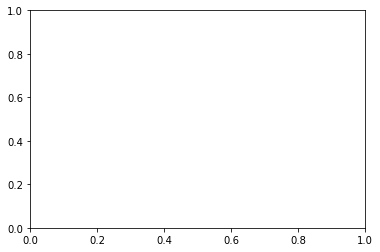

In [5]:
# pg. 68 - Normal Inverse Gaussian Distribution
fig, ax = plt.subplots(1, 1)

In [17]:
r = norminvgauss.rvs(1, .9, size=1000)

In [18]:
ax.hist(r)
#ax.legend(loc='best', frameon=False)
plt.show()
# TODO: get this working https://youtu.be/c_1w2XgsHL0?t=1291
# show the same lines as in the vid

In [26]:
# 4.4 pg 73
# std = sqrt(average(deviations^2))
# mad = average(sqrt(deviations^2)) 

In [27]:
# std >= MAD: sqrt is a concave function, hence sqrt of average >= average of sqrt (jensen's inequality)
data = random.choices(list(range(0, 100)), k=100)
avg = sum(data)/len(data)
std = np.std(data)
mad = np.mean(np.absolute(data-np.mean(data)))

In [28]:
avg, std, mad

(53.84, 27.396247918282533, 22.946399999999997)

In [29]:
# STD = MAD if and only if all deviations have same magnitude e.g. a dataset where all values are one above mean or one less than mean
data = [1]*5 + [3]*5
avg = sum(data)/len(data)
std = np.std(data)
mad = np.mean(np.absolute(data-np.mean(data)))

In [30]:
avg, std, mad

(2.0, 1.0, 1.0)

In [8]:
# pg 73 stock retrun example:
# std = mad * sqrt(pi/2)  // in gaussian world
mad = .01
sigma = mad * math.sqrt(math.pi/2)

In [13]:
# daily STD (approx 1.25%):
print(sigma)

0.012533141373155001


In [14]:
# yearly STD (approx 20%):
print(sigma * math.sqrt(256))

0.20053026197048002


In [15]:
# Ratio of STD/MAD for gaussian is sqrt(pi/2) (approx 1.253)
# When the ratio is greater than that, then we can assume data is fat tailed

In [5]:
# example pg 74
data_pts = 10**6
x = [-1]*(data_pts-1)
x.append(10**6)
np.std(x), np.mean(np.absolute(x-np.mean(x)))

(1000.000499999375, 1.999999999997998)

In [6]:
np.std(x)/np.mean(np.absolute(x-np.mean(x)))

500.00025000018803

In [7]:
# for gaussian, ratio of STD/MAD is ~1.25
# but rises with fat tails
# Here in the extreme case we see the ratio is 500

In [8]:
# Why did science pick STD over MAD?
# In a gaussian world, STD is 12% more "efficient" than MAD
# Efficient here means when taking samples of the data, STD will tend to be more accurate than MAD by 12.5%
# but that is only in Gaussian world

In [19]:
def mad(data):
    return np.mean(np.absolute(data-np.mean(data)))

In [5]:
rng = np.random.default_rng()

In [26]:
# Stolen code from: https://youtu.be/c_1w2XgsHL0?t=2541
# https://github.com/Technical-Incerto-Reading-Club/code-examples/blob/main/Session%202/FM%20-%20NB29%20-%20Std%20vs%20MAD%20Efficiency.ipynb
def sample_mixed_norm(jump_sigma, jump_prob, n):
    '''
    Samples from normal distribution, w/ occasional spikes in standard deviation
    STD switches from 1 to jump_sigma w/ probability jump_prob
    
    jump_sigma: std of high variance distribution
    jump_prob: prob of sampling from high variance distrib
    n: number of output samples
    '''
    
    normals = rng.standard_normal(n)
    jump_flag = rng.binomial(1, jump_prob, n)
    jump_flag = jump_flag.astype(bool)
    norm_flag = ~jump_flag
    
    jump_flag_rvs = normals*jump_flag*jump_sigma
    norm_flag_rvs = normals*norm_flag
    
    mixed_rvs = jump_flag_rvs + norm_flag_rvs
    return mixed_rvs


def get_efficiency(data):
    var = np.var(data)
    mean = np.mean(data)
    
    eff = var/mean**2
    return eff

In [32]:
sample_mixed_norm(100, .5, 3)

array([-37.11321897, -55.36069275,  -0.5148995 ])

In [33]:
get_efficiency([0, 10, 20])

0.6666666666666667

In [34]:
# check Gaussian case
n_samples = 100000
n_datapoints = 1000
jump_sigma = 0
jump_prob = 0

In [35]:
samples = [sample_mixed_norm(jump_sigma, jump_prob, n_datapoints) for i in range(n_samples)]

In [36]:
std_samples = [np.std(sample) for sample in samples]
mad_samples = [mad(sample) for sample in samples]

In [37]:
std_efficiency = get_efficiency(std_samples)
mad_efficiency = get_efficiency(mad_samples)

In [38]:
std_efficiency

0.0004991823494424019

In [39]:
mad_efficiency

0.0005702447322861765

In [44]:
# efficiency ratio
std_efficiency/mad_efficiency

0.8753826579705921

In [41]:
# pg 76
# here we see that STD is ~12.5% more efficient than MAD (1 - .875)
1/(math.pi-2)

0.8759691969420544

<AxesSubplot:title={'center':'Distribution of sample estimates'}, ylabel='Frequency'>

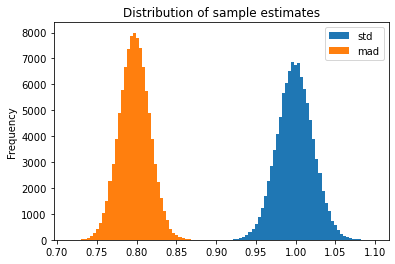

In [42]:
# visualize STD vs MAD, similar to pg 78
d = {'std': std_samples, 'mad': mad_samples}
df = pd.DataFrame(d)

df.plot(kind='hist', bins=100, title='Distribution of sample estimates')

In [47]:
# check fat tailed example
n_samples = 100000
n_datapoints = 1000
jump_sigma = 4
jump_prob = .1
samples = [sample_mixed_norm(jump_sigma, jump_prob, n_datapoints) for i in range(n_samples)]
std_samples = [np.std(sample) for sample in samples]
mad_samples = [mad(sample) for sample in samples]
std_efficiency = get_efficiency(std_samples)
mad_efficiency = get_efficiency(mad_samples)
std_efficiency/mad_efficiency

2.19830856215039

In [48]:
# now ratio is greater than 2

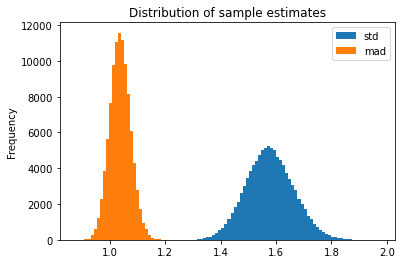

In [49]:
d = {'std': std_samples, 'mad': mad_samples}
df = pd.DataFrame(d)

df.plot(kind='hist', bins=100, title='Distribution of sample estimates')

In [50]:
# normalize to overlay
std_mean = np.mean(std_samples)
mad_mean = np.mean(mad_samples)

# Practical Method (Think error magnitude)
std_normalised_samples = std_samples - std_mean
mad_normalised_samples = mad_samples - mad_mean

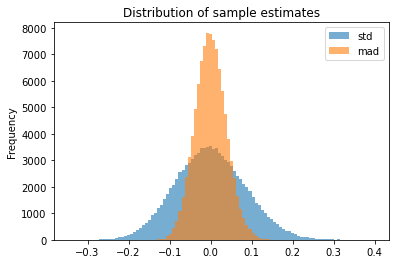

In [51]:
d = {'std': std_normalised_samples, 'mad': mad_normalised_samples}
df = pd.DataFrame(d)

df.plot(kind='hist', bins=100, title='Distribution of sample estimates', alpha=0.6);

In [15]:
# pg 79
# Gaussian world
# STD/MAD = sqrt(pi/2)
data = np.random.normal(0, 1, 100000)
std = np.std(data)
mad = np.mean(np.absolute(data-np.mean(data)))
std/mad, math.sqrt(math.pi/2)

(1.2543410422224264, 1.2533141373155001)

In [16]:
# pg 80
# Power law e.g. Student T w/ tail exponent alpha=3
# STD/MAD = pi/2
data = np.random.standard_t(3, size=1000000)
std = np.std(data)
mad = np.mean(np.absolute(data-np.mean(data)))
std/mad, math.pi/2

(1.5511078268756548, 1.5707963267948966)